# Multiprocessing

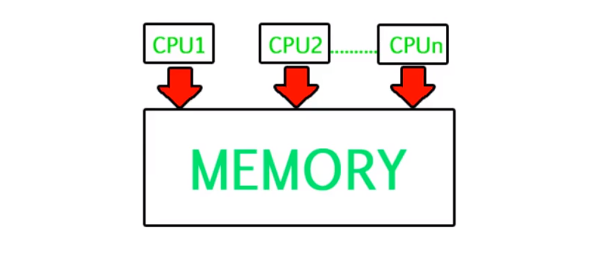

You have multiple processing units, like CPU1, CPU2,...CPU(N). You have a big problem and you split the problem into subproblem and the CPU will run each problem parallely (simultaniously). Which will help you obtain the result in shorter time.


## What ?
Multiprocessing refers to the ability of a system to support more than one processor at the same time. Applications in a multiprocessing system are broken to smaller routines that run independently. The operating system allocates these threads to the processors improving performance of the system.

## Why ?
Consider a computer system with a single processor. If it assigned several processes at the same time, it will have to interrupt each and switch brifly to another, to keep all of the processes going. The situation is just like a chef working in a kitchen alone. He has to do several tasks like baking, stirring, keading dough etc.

The more tasks you must do at once, the more difficult it gets to keep track of them all, and keeping the timing right becomes more of a challenge.

## How ?

**A multiprocessing system can have**
- Multiprocessor, i.e. a computer with more than one central processor.
- Multi-core processor, i.e., a single computer component with two ore more interdependent actual processing units (called cores)

> Here, a CPU can easily executes several tasks at once, with each task using its own processor. It is just like the chef in last situation being assisted by his assistants. Now, they can divide the task among themselves and chef doesn't need to switch between his tasks.

# Multiprocessing in Python

In Python, the multiprocessing module includes a very simple and intutive API for dividing work between multiple processes.

Ref: https://docs.python.org/3/library/multiprocessing.html

In [39]:
def print_cube(number: int) -> None:
    print(f"Cube: {number ** 3}")
    
def print_square(number: int) -> None:
    print(f"Square: {number ** 2}")

In [40]:
print_cube(3)
print_square(3)

Cube: 27
Square: 9


Now, i want a situation where i want to print both cube or square at the same time. And 2 of my processing unit is processing them at the same time.

In [41]:
import multiprocessing

# Helper functions
multiprocessing.cpu_count()

16

We have 16 CPU(s) or 16 processing units, what will happen if we give more that 16 tasks, that would not be ideal.

In [42]:
# To implement multiprocessing, we first have to create process, 
# which is a class in multiprocessing module, which takes a task 
#to execute.

import multiprocessing

# target: funtion to run
# args: params to pass into the function
process_1 = multiprocessing.Process(target=print_cube, args=(5,))
process_2 = multiprocessing.Process(target=print_square, args=(5,))

In [43]:
# we have created our process, but they are not executed yet.
process_1.start() # will start the child process, and the code will
           # be blocked here, it sends the command to the CPU.
    
process_1.join() # will make your program wait, till you p1 is actually
          # complete
    
print("DONE")

Cube: 125
DONE


In [44]:
# Now in order to successfully run them in parallel we have
# to start both the processes at the same time and wait
# for them to complete

process_1 = multiprocessing.Process(target=print_cube, args=(5,))
process_2 = multiprocessing.Process(target=print_square, args=(5,))

#starting them in paralled
process_1.start()
process_2.start()

# waiting for both of them to complete
process_1.join()
process_2.join()
print("DONE")

Cube: 125
Square: 25
DONE


In [45]:
# To check if your process in still alive, means it is still running:
process_1.is_alive() # it is True, when process is in between start and join
process_2.is_alive()

False

Now, Just to make sure, different processes are running different things, let's try to check something more.
We can modify the above code, but let's re-write them.

In [46]:
import os

def print_cube(number: int) -> None:
    print(f"PID::print_cube::id -> {os.getpid()}")
    print(f"Cube: {number ** 3}")
    
def print_square(number: int) -> None:
    print(f"PID::print_square::id -> {os.getpid()}")
    print(f"Square: {number ** 2}")

In [47]:
print(print_cube(2))
print(print_square(2))

PID::print_cube::id -> 308503
Cube: 8
None
PID::print_square::id -> 308503
Square: 4
None


In [48]:
process_1 = multiprocessing.Process(target=print_cube, args=(2,))
process_2 = multiprocessing.Process(target=print_square, args=(2,))

process_1.start()
process_2.start()
process_1.join()
process_2.join()
print("DONE...")

PID::print_cube::id -> 330203
Cube: 8
PID::print_square::id -> 330206
Square: 4
DONE...


# Sharing data between processes

In multiprocessing, any newly created process will do following:
- run independently
- have their own memory space

We want to see, how child and parent process can talk to each other.

In [49]:
import multiprocessing

In [50]:
result = []

In [51]:
def square_list(mylist):
    global result
    
    for num in mylist:
        result.append(num ** 2)
    print(f"Result: {result}")

In [52]:
mylist = [1, 2, 3, 4, 5]

In [53]:
process_1 = multiprocessing.Process(target=square_list, args=(mylist,))
process_1.start()
process_1.join()
print("DONE...")

Result: [1, 4, 9, 16, 25]
DONE...


In [54]:
print(result)

[]


As per my parent process, he result is empty, but the client process has result, which shows that both have different memeory spaces.

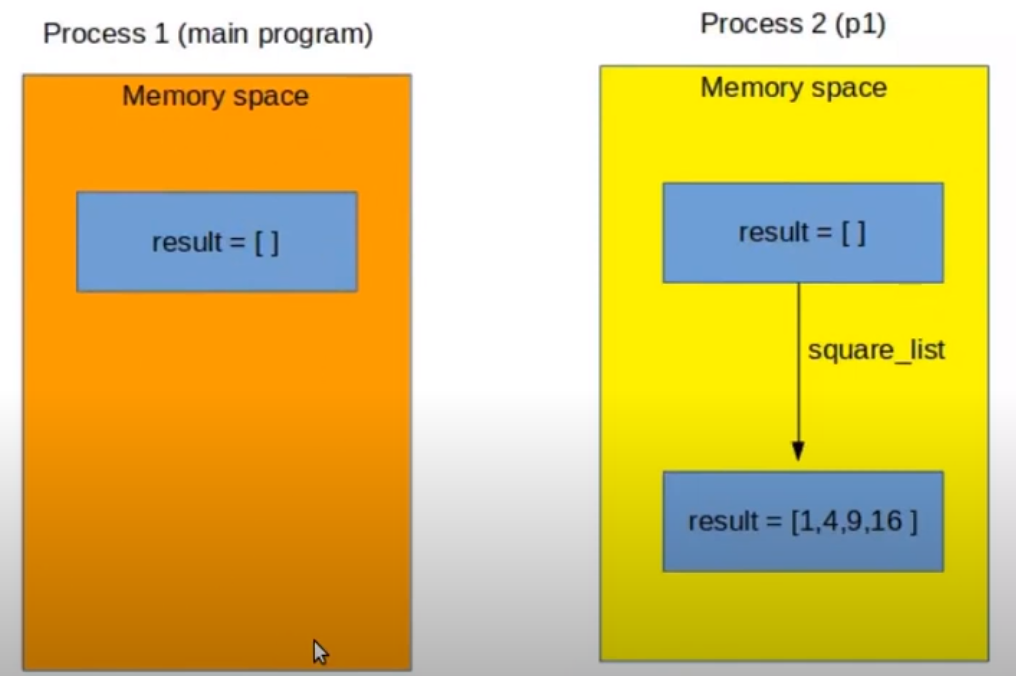

So, as we saw there is an issue with data sharing...
In the above case the data is with the memory space of the process and not the global memeory space, we'll see how we can fix this.

There are different methods to solve this issue:
- Shared Memory

## METHOD 1: Shared Memory

Multiprocessing module provides `Array` and `Value` objects to share data between processes.
- **Array**: a ctype array allocated for shared memory
- **Value**: a ctype object allocated for shared memory

In [2]:
import multiprocessing

In [3]:
def square_list(mylist, result, square_sum):
    for idx, num in enumerate(mylist):
        result[idx] = num ** 2
    
    square_sum.value = sum(result)

In [4]:
my_list = [1, 2, 3, 4]

In [5]:
# creating shared memoery array

result = multiprocessing.Array('i', 4) # i: integer; 4: size (c programming style array)

square_sum = multiprocessing.Value('i') # value object to store integer

process_1 = multiprocessing.Process(target=square_list, args=(my_list, result, square_sum))

process_1.start()
process_1.join()
print("Process completed...")

Process completed...


In [13]:
# We have defined some variables (result, square_sum) 
# in the main process and they are getting changed in the 
# child process.
print(square_sum.value) # to access Value object

# to get the values from multiprocessing array you have to iterate it
print([result[i] for i in range(4)])

30
[1, 4, 9, 16]


This is how your shared memeory look:
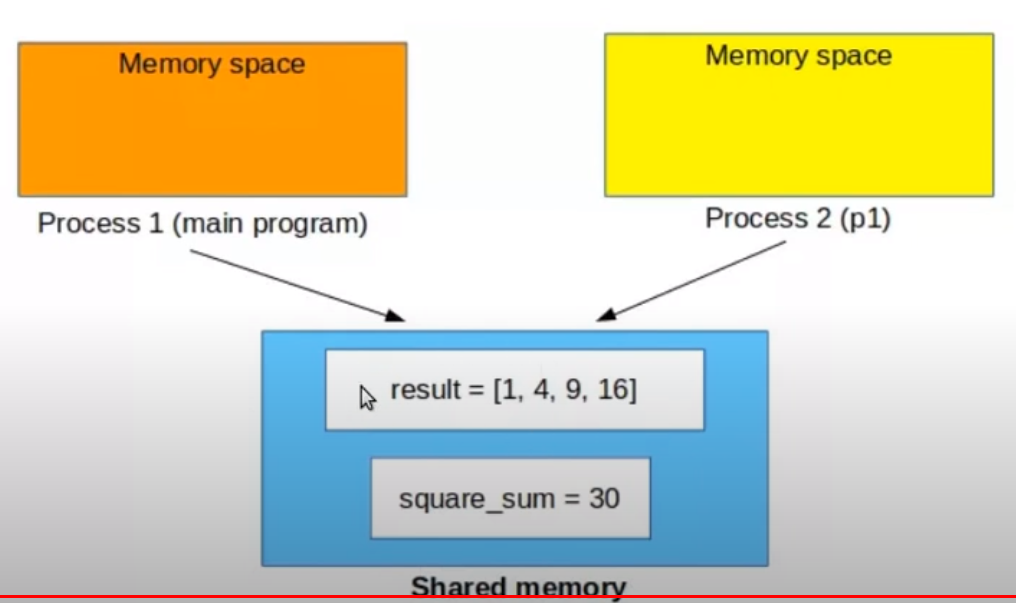

## METHOD 2: Server Process

Whenever a python program starts, a **server process** is also started. From there on, whenever a new process is needed, the parent process connects to the server and requests it to fork a new process. A server process can hold Python objects and allows other processes to manipulate them using proxies.

Multiprocessing module provides a **Manager** class which controls a server process. Hence, managers provide a way to create data which can be shared between different processes

We've seen how we can share data across different processes using shared memeory using multiprocessing. Now we'll see a flexible way of doing the same thing, before that refer the example below

In [14]:
import multiprocessing

def print_record(records):
    for record in records:
        print(f"Name: {record[0]}\nScore: {record[1]}\n")
        
def insert_record(record, records):
    records.append(record)
    print("New record added!")
    
records = [("sam", 10), ("adam", 9), ("kevin", 8)]
new_record = ("jeff", 7)

p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
p2 = multiprocessing.Process(target=print_record, args=(records,))

p1.start()
p1.join()

p2.start()
p2.join()

New record added!
Name: sam
Score: 10

Name: adam
Score: 9

Name: kevin
Score: 8



As we can see above, we've created two processes and we triggered them linearly but still the newly added record is not printed in the execution of p2.
- Because the `records` list is local to my parent process and all the child process have their own image of records list and according to p2 the changes reflected by p1 are not reflected back.
- So, in summary there are two child processes and they are not able to coordinate with each other, they are working on different copies of the same data.

In the case of shared memeory we were having arrays and values, two types of objects used by the shared memeroy and used by all the parent and child processes. But, this method is not very flexible you are not able to use your local python objects or data structures like list, tuple, dict etc. 

To do that there is a better method using "Server Process"

We'll now modify the above code in a way to using manager class to use server process

In [16]:
import multiprocessing

def print_record(records):
    for record in records:
        print(f"Name: {record[0]}\nScore: {record[1]}\n")
        
def insert_record(record, records):
    records.append(record)
    print("New record added!")

"""
    The server process contains all the data structures so
    you can store you data inside of it using manager object
    eg: manager.list([...]), manager.dict({...}) etc.
"""

with multiprocessing.Manager() as manager:
    
    records = manager.list([("sam", 10), ("adam", 9), ("kevin", 8)])
    new_record = ("jeff", 7)
    
    p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
    p2 = multiprocessing.Process(target=print_record, args=(records,))
    
    p1.start()
    p1.join()
    
    p2.start()
    p2.join()

New record added!
Name: sam
Score: 10

Name: adam
Score: 9

Name: kevin
Score: 8

Name: jeff
Score: 7



Now, you can see that with the use of **Manager** class from multiprocessing we are able to share python data structure across parent and child processes and insert/update record in parent process.
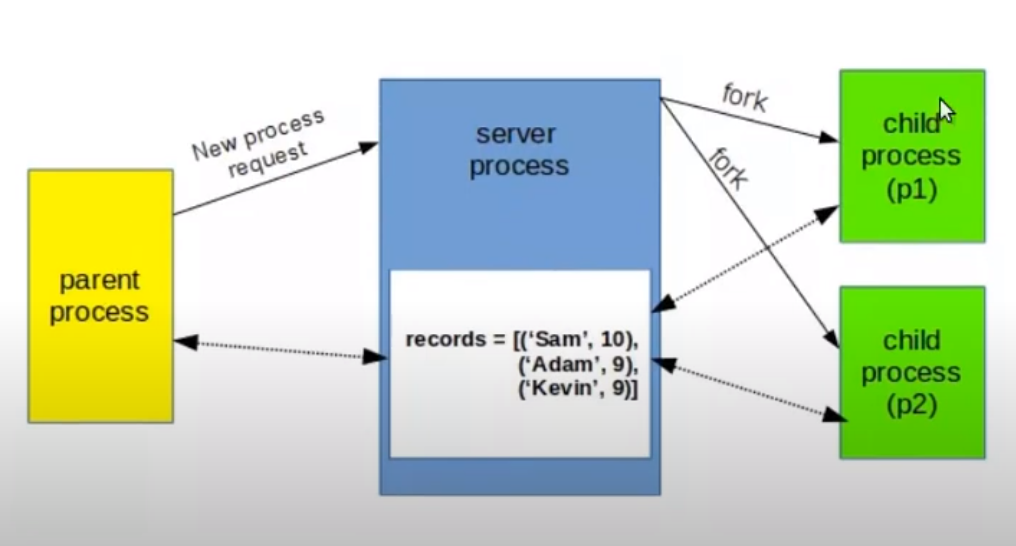

- Parent process started server process
- server process stores records
- it then forks two child processes (p1, p2)
- p1 and p2 have access to records from server process
- done! 

memeory space of server process is containing all the records

SO, far we've seen how data is shared amount different processes, now we'll see how to communicate between different processes

# Communication between processes

Effective use of multiprocess usually requires some communication between them, so that work can be divided and results can be aggregated.

So, multiprocessing supports two types of communication channel between processes:
- **Queue**
- **Pipe**

In case of communication, we've got a channel which have two ends, from one end you can write the message and from the other end you can read those messages.So, for multiprocessing in python we have got two channels `Queue` and `Pipe`.
- In case of `Queue` there are two ends (one for reading and other for writing)
- In case of `Pipe` it is a dual way, both the ends can be used for reading as well as writing.

## METHOD 1: Queue

A simple way to communicate between processes with multiprocessing is to use `Queue` to pass messages back and forth. Any Python object can pass through a Queue

In [17]:
## Let's take a scenario, there is a func that squares a list
## the size of list is very large, so i want to print the message
## as it is processing the list of numbers


def square_list(my_list, q):
    for num in my_list:
        q.put(num ** 2) # we'll keep putting the result in the queue and now
                        # there should be someone to read those messages (print_list)
            
def print_list(q):
    while not q.empty():
        print(q.get())

In the above func, we've create two functions, which will be running on different processes
- `square_list` to simply square the number and push it to a queue (running in a separate process)
- `print_list` will listen to a queue and as long as it is not empty it will print the result in another process

In [18]:
import multiprocessing

q = multiprocessing.Queue()

In [19]:
p1 = multiprocessing.Process(target=square_list, args=([1, 2, 3, 4, 5, 6], q))
p2 = multiprocessing.Process(target=print_list, args=(q,))

p1.start()
p2.start()

p1.join()
p2.join()

print("Completed!")

1
4
9
16
25
36
Completed!


In the example above, we've effected the communication between the two processes using Queue, process p1 is pushing data to the queue and process p2 is reading the data coming in the queue from p1 and printing the result

## METHOD 2: Pipe

- A `Pipe()` can only have two endpoints.
- A `Queue()` can have multiple producers and consumers.
- If you need more than two points to communicate, use a `Queue()`.
- If you need absolute performance, a Pipe() is much faster because `Queue()` is built on top of `Pipe()`

In [20]:
msgs = ["hello", "hi", "heya!", "END"]

def send_msg(conn, msgs):
    for msg in msgs:
        conn.send(msg)
    conn.close()
    
def recv_msg(conn):
    while True:
        msg = conn.recv()
        if msg == "END":
            break
        print(msg)

In [21]:
import multiprocessing

# pipe returns parent and child connections
parent_conn, child_conn = multiprocessing.Pipe()

p1 = multiprocessing.Process(target=send_msg, args=(parent_conn, msgs))
p2 = multiprocessing.Process(target=recv_msg, args=(child_conn,))

p1.start()
p2.start()

p1.join()
p2.join()

hello
hi
heya!


Same, the parent connection send the message which is received by the child connection.
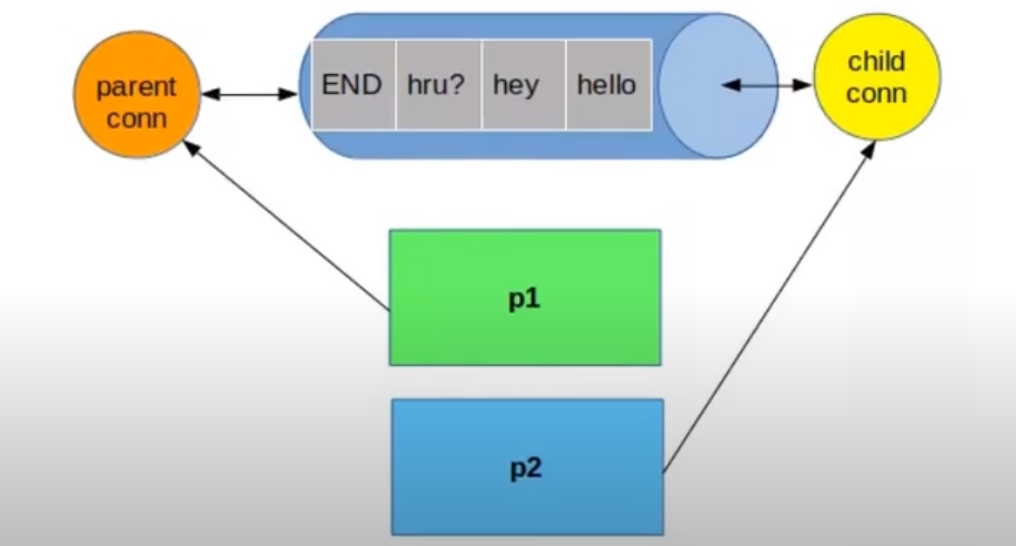

Data in a pipe may become corrupted if two processes (or threads) try to read from or write to the same end of the pipe at the same time. Of course there is no rist of corruption from processes using different ends of the pipe at the same time. Also note that, Queue do proper synchroniztion between processes, at the expense of more complexity. Hence, queues are said to be thread and process safe!

# Polling between processes

Now, we'll see another problem, that can be solved with pooling between processes, before that let's see an example

In [1]:
def square(n):
    return n ** 2

my_list = [1, 2, 3, 4, 5]
results = []

for num in my_list:
    results.append(square(num))
    
print(results)

[1, 4, 9, 16, 25]


In the above example, the situation is something like show in the below image:
- Your main process in running on one of the cores.
- You list is passed to that process the square func is applied and the result is obtained.

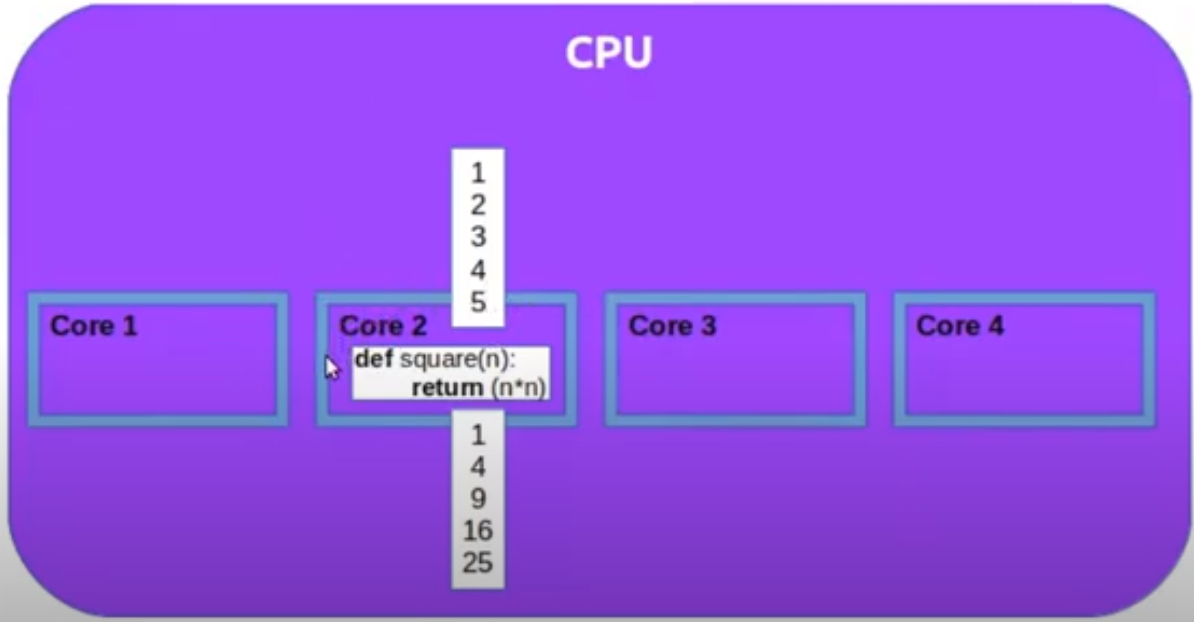


Now, we want to change this thing, processing this list consecutively is time consuming, what if we can use other cores, all at the same time by distributing this list between them through multi processing. Something list shown in the image below.
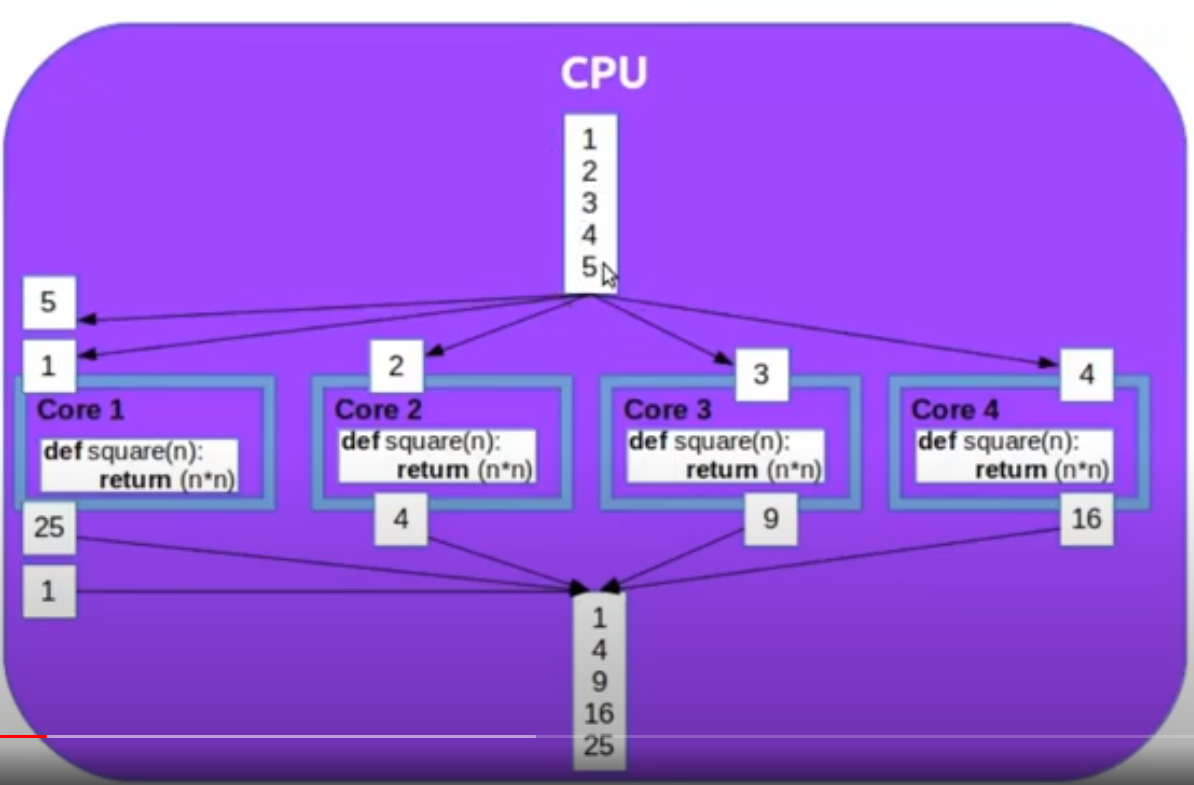

The concept, show above is called polling.
- You create a task, then distribute it among different processes.
- Once the task is complete you combine the output together.

In [14]:
import os

def square(n: int) -> int:
    print(f"\n{n} -> pid:{os.getpid()}")
    return n ** 2

In [15]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
results = []

In [20]:
# implementing pool through multiprocessing
import multiprocessing

p = multiprocessing.Pool()

# p.map(square, my_list) # func, list on which to apply

result = p.map(square, my_list)
print("\nFinal result")
print(result)


1 -> pid:2493189
3 -> pid:2493191
4 -> pid:2493192
Final result
[1, 4, 9, 16, 25, 36, 49, 64, 81]

6 -> pid:2493194
2 -> pid:2493190
5 -> pid:2493193
8 -> pid:2493196
7 -> pid:2493195
9 -> pid:2493197










Process ForkPoolWorker-132:
Process ForkPoolWorker-133:
Process ForkPoolWorker-141:
Process ForkPoolWorker-135:
Process ForkPoolWorker-134:
Process ForkPoolWorker-131:
Process ForkPoolWorker-143:
Process ForkPoolWorker-137:
Process ForkPoolWorker-138:
Process ForkPoolWorker-136:
Process ForkPoolWorker-129:
Process ForkPoolWorker-130:
Process ForkPoolWorker-142:
Process ForkPoolWorker-140:
Process ForkPoolWorker-139:
Traceback (most recent call last):
Process ForkPoolWorker-144:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
T

# Synchronization between processes

Process synchronization is defined as a mechanism which ensures that two or more concurrent processes do not simultaniously execute some particular segment known as **critical section**

**`Critical Section`** refers to the parts of the program where the shared resource is accessed
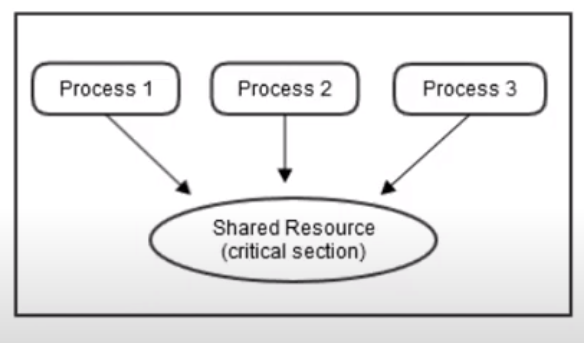

*Concurrent accesses to shared resources can lead to **race contitions**.*

In [3]:
## Sample example of race condition

import multiprocessing

In [4]:
def withdraw(balance):
    for _ in range(10000):
        balance.value = balance.value - 1
        
def deposit(balance):
    for _ in range(10000):
        balance.value = balance.value + 1

In [5]:
def perform_transactions():
    balance = multiprocessing.Value('i', 100)
    
    p1 = multiprocessing.Process(target=withdraw, args=(balance,))
    p2 = multiprocessing.Process(target=deposit, args=(balance,))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final balance: {}".format(balance.value))

In [6]:
for _ in range(10):
    perform_transactions()

Final balance: 100
Final balance: 407
Final balance: 431
Final balance: 146
Final balance: 173
Final balance: 259
Final balance: 59
Final balance: 8
Final balance: 100
Final balance: 382


My correct value always should have been `100`. But looks like it's not true in this case which means there is some problem we are not getting the intended value and this is because of the race condition.

How this inconsistency is happening ?
- Both the process is reading the data at different time.
  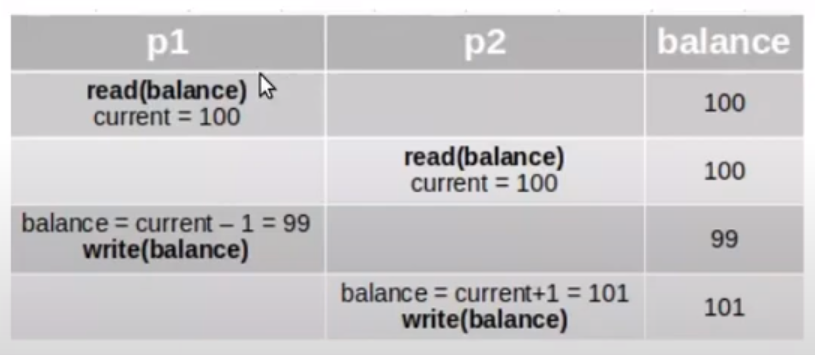
- What we want is one process should read and then the other process should write etc.
  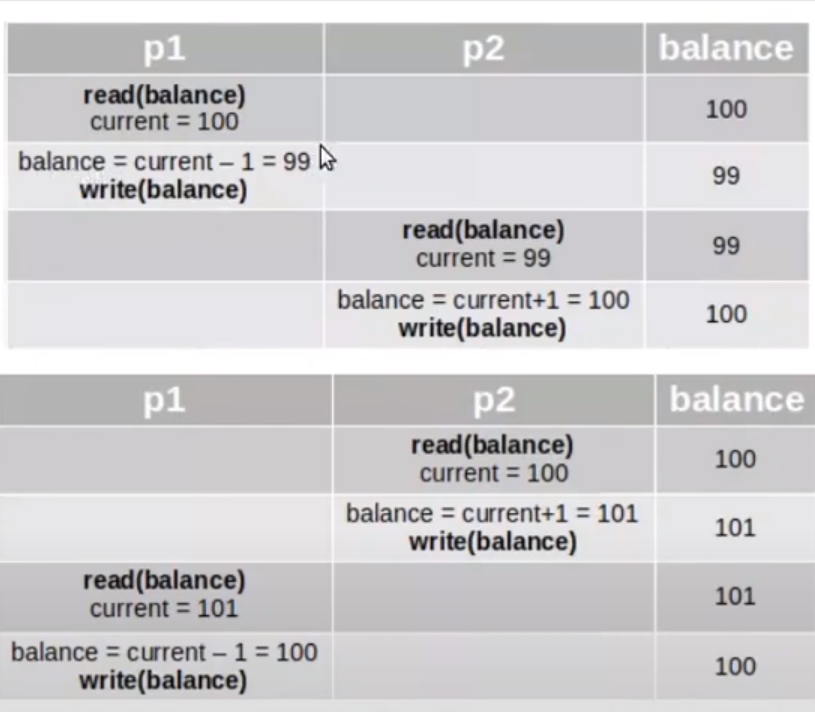
  
This is called, process synchronization and to obtain this we need something called as Lock.
So, in order to achieve process synchronization.
- When process (p1) wants to manipulate the balance, it will first ask for a lock and p1 will get lock over the balance. Now, only process p1 can do anything with the variable.
- If process (p2) wants to do anything with balance, it will first ask for the lock and that lock cannot be given to p2 unless p1 release the lock.

This was the ordering will be maintained.

In [9]:
import multiprocessing

In [10]:
def withdraw(balance, lock):
    for _ in range(10000):
        # this is the critical section where we are modifying data
        # so, i'll first try to acquite lock
        lock.acquire()
        balance.value = balance.value - 1
        lock.release()
        
def deposit(balance, lock):
    for _ in range(10000):
        lock.acquire()
        balance.value = balance.value + 1
        lock.release()

In [11]:
def perform_transactions():
    balance = multiprocessing.Value('i', 100)
    
    lock = multiprocessing.Lock()
    
    p1 = multiprocessing.Process(target=withdraw, args=(balance, lock))
    p2 = multiprocessing.Process(target=deposit, args=(balance, lock))
    
    p1.start()
    p2.start()
    
    p1.join()
    p2.join()
    
    print("Final balance: {}".format(balance.value))

In [12]:
for _ in range(10):
    perform_transactions()

Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
Final balance: 100
